In [3]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 30.4 MB/s 


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import visualkeras
import os

# Celsius vs Fahrenheit

In [4]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [5]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model_1.compile(loss= tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(0.1))

h = model_1.fit(celsius_q, fahrenheit_a, 
                s=500, verbose=False)

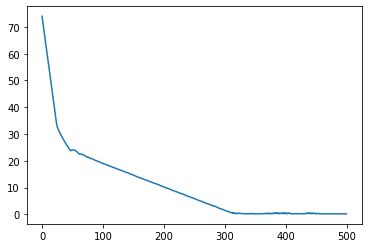

In [6]:
plt.plot(h.history['loss'])

In [7]:
visualkeras.layered_view(model_1)

# Images of clothing

In [8]:
import tensorflow_datasets as tfds

In [9]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4NTEY9/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4NTEY9/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [10]:
train, test = dataset['train'], dataset['test']

In [11]:
class_names = metadata.features['label'].names

In [12]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples

In [13]:
def normalizer(image, labels):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, labels

train = train.map(normalizer)
test = test.map(normalizer)

train = train.cache()
test = test.cache()

In [14]:
type(metadata)

tensorflow_datasets.core.dataset_info.DatasetInfo

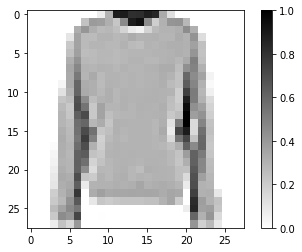

Pullover


In [15]:
for i, ii in train.take(1):
    break
i = i.numpy().reshape(28,28)

plt.figure()
plt.imshow(i, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[ii])

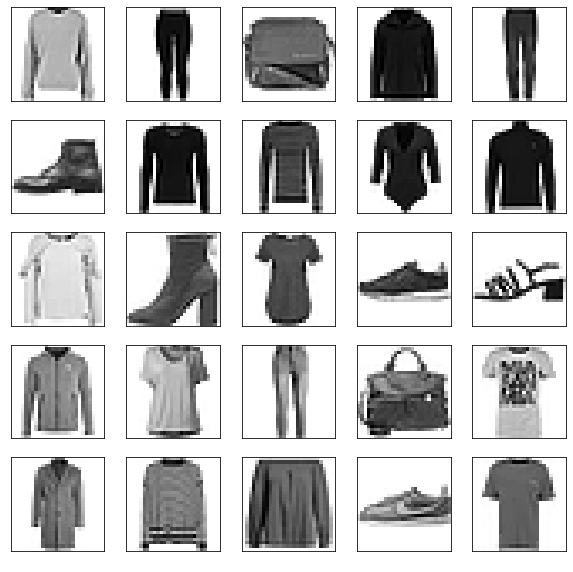

In [16]:

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train.take(25)):
    image = image.numpy().reshape(28,28)
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label], color="white")

In [17]:
BATCH_SIZE = 32
train = train.cache().repeat().shuffle(num_train).batch(BATCH_SIZE)
test = test.cache().batch(BATCH_SIZE)

In [18]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

h_2 = model_2.fit(train, epochs=5, steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.4999 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3699 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3348 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3077 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2888 - accuracy: 0.8925


In [19]:
test_loss, test_accuracy = model_2.evaluate(test, steps=np.ceil(10000/32))

313/313 [==============================] - 2s 5ms/step - loss: 0.3754 - accuracy: 0.8669


In [20]:
visualkeras.layered_view(model_2)

In [21]:
h_2.history

{'loss': [0.49990546703338623,
  0.369930624961853,
  0.3348234295845032,
  0.3077406883239746,
  0.28876417875289917],
 'accuracy': [0.82423335313797,
  0.8657333254814148,
  0.8769166469573975,
  0.8859500288963318,
  0.892549991607666]}

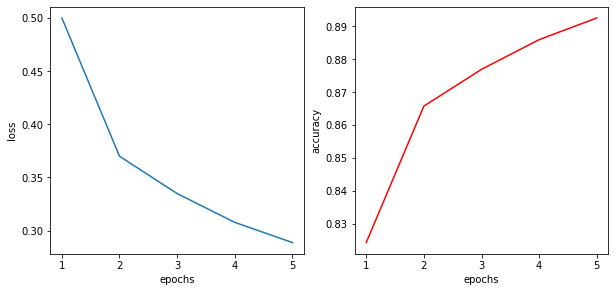

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot((1,2,3,4,5), h_2.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(2,2,2)
plt.plot((1,2,3,4,5),h_2.history['accuracy'], color='r')
plt.ylabel('accuracy')
plt.xlabel('epochs');

## another way to load data

In [23]:
from tensorflow import keras

In [24]:
data = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# 4

In [29]:
import cv2
from scipy import misc

In [30]:
i = misc.ascent()

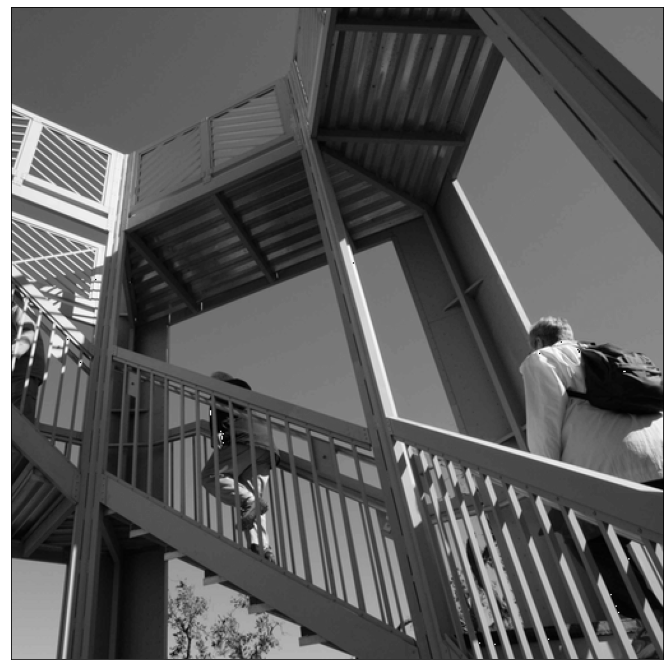

In [31]:
plt.figure(figsize=(15,12))
plt.gray()
plt.grid(False)
plt.imshow(i)
plt.xticks([])
plt.yticks([]);

# Convolutional Neural Network

In [25]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])



In [28]:
model_cnn.fit(train, epochs=5, steps_per_epoch=np.ceil(60000/32))

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3701 - accuracy: 0.8675
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2516 - accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2099 - accuracy: 0.9224
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1772 - accuracy: 0.9352
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1528 - accuracy: 0.9437


In [33]:
model_cnn.evaluate(test, steps=np.ceil(10000/32))

313/313 [==============================] - 3s 8ms/step - loss: 0.2662 - accuracy: 0.9112


[0.2661522924900055, 0.9111999869346619]

# image augmentation and drop out **(cats & dogs dataset)**

In [6]:
load_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=load_url, extract=True)

In [7]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [8]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
num_cats_tr,num_cats_val, num_dogs_tr, num_dogs_val

(1000, 500, 1000, 500)

In [11]:
batch = 100
img_shape = 150

In [12]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [13]:
train_data_gen = image_generator.flow_from_directory(batch_size=batch,
                                                     directory= train_dir,
                                                     shuffle=False,
                                                     target_size=(img_shape,img_shape),
                                                     class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [14]:
val_data_gen = image_generator.flow_from_directory(batch_size=batch,
                                                   directory=validation_dir,
                                                   shuffle=False,
                                                   target_size=(img_shape, img_shape),
                                                   class_mode='binary'
                                                   )

Found 1000 images belonging to 2 classes.


In [15]:
from tensorflow.python.training.saver import metrics
model_cnn_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


model_cnn_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
h_3 = model_cnn_2.fit_generator(
    train_data_gen,
    steps_per_epoch=np.ceil(total_train/batch),
    epochs=100,
    validation_data=val_data_gen,
    validation_steps=np.ceil(total_val/batch)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
20/20 [==============================] - 20s 427ms/step - loss: 2.9452 - accuracy: 0.4180 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 8s 420ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 8s 420ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 8s 416ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 9s 454ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 8s 423ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 10s 489ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.50

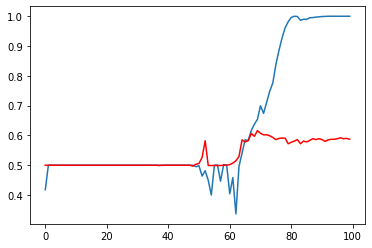

In [23]:
plt.plot(h_3.history['accuracy'])
plt.plot(h_3.history['val_accuracy'], color='r');

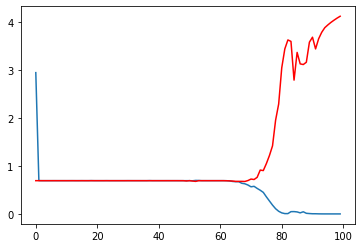

In [19]:
plt.plot(h_3.history['loss'])
plt.plot(h_3.history['val_loss'], color='r')

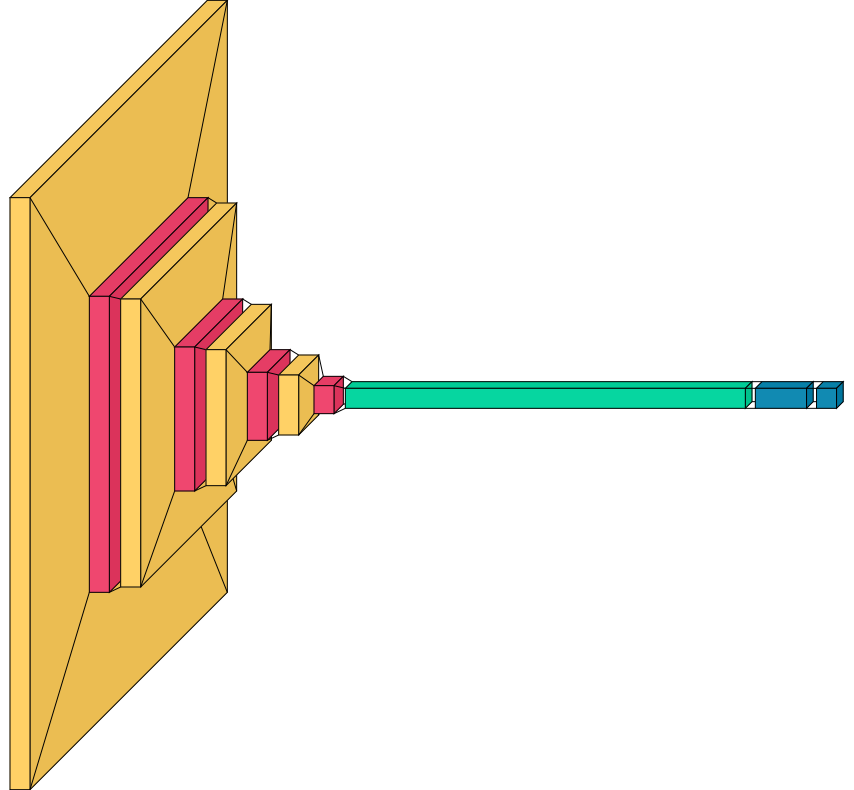

In [24]:
visualkeras.layered_view(model_cnn_2)